In [2]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import sys
import os
from PIL import Image
import ipywidgets as widgets
from IPython.display import display, clear_output
%matplotlib inline

In [3]:
answers = pd.read_excel('Do analizy czynnikowej esencjalizm.xlsx')
pandas_profiling.ProfileReport(answers)

Number of variables,34
Number of observations,248
Total Missing (%),0.0%
Total size in memory,66.0 KiB
Average record size in memory,272.3 B
Numeric,32
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [4]:
image1 = Image.open('ZDJECIA-AKTOROW.zip (Unzipped Files)/ZDJECIA-AKTOROW/a01.jpg')
filenames = os.listdir('ZDJECIA-AKTOROW.zip (Unzipped Files)/ZDJECIA-AKTOROW/')
loaded_images = dict(zip(filenames, map(lambda image : Image.open(f'ZDJECIA-AKTOROW.zip (Unzipped Files)/ZDJECIA-AKTOROW/{image}'), filenames)))

In [5]:
results = pd.read_excel('Wyniki_CNK_Analiza.xlsx')
emocje = results.loc[np.isnan(results.Zaufanie_NumerFoto)]
emocje.drop(['data','czas','Zaufanie_NumerFoto','face_filename2_ZAUFANIE','correct'],axis=1,inplace=True)
emocje.reset_index(drop=True, inplace=True)
zaufanie = results.loc[np.logical_not(np.isnan(results.Zaufanie_NumerFoto))]
zaufanie.drop(['data','czas','face_category_and_gender', 'Emocje_NumerFoto' ,'face_filename1_EMOCJE','correct'],axis=1, inplace=True)
zaufanie.reset_index(drop=True,inplace=True)

/home/siemashko/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [6]:
pandas_profiling.ProfileReport(emocje)

Number of variables,12
Number of observations,8820
Total Missing (%),0.0%
Total size in memory,827.0 KiB
Average record size in memory,96.0 B
Numeric,9
Categorical,2
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [7]:
pandas_profiling.ProfileReport(zaufanie)

Number of variables,11
Number of observations,8820
Total Missing (%),0.0%
Total size in memory,758.0 KiB
Average record size in memory,88.0 B
Numeric,9
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,0


IntText(value=8)

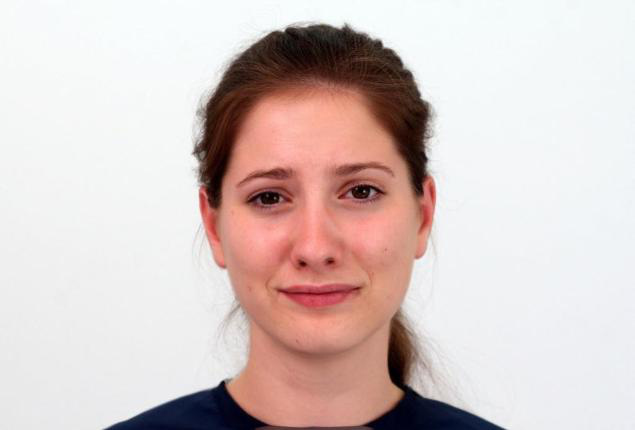

In [8]:
w = widgets.IntText()
display(w)

def on_change(change):
    clear_output(wait=True)
    display(w)
    display(loaded_images[emocje.loc[change['new'],'face_filename1_EMOCJE']])

w.observe(on_change,names='value')